### 1. Upload dataset (.dta)

In [1]:
use "https://github.com/worldbank/Stata-IE-Visual-Library/raw/develop/Library/Bar%20plots/Bar%20plot%20of%20two%20variables/data.dta", clear

### 2. Setting format of graph

In [2]:
global graph_opts1 bgcolor(white) graphregion(color(white)) legend(region(lc(none) fc(none))) ///
	ylab(,angle(0) nogrid) title(, justification(left) color(black) span pos(11)) subtitle(, justification(left) color(black))

### 3. Keeping only the data relevant to the graph

In [3]:
qui drop if type == "Baseline Vignette"

qui keep if ///
(	  regexm(study,"China") | regexm(study,"Delhi") ) ///
& ///
(	  regexm(case,"Diarrhea") | regexm(case,"TB1") )

### 4. Creating unique ID code per variables

In [4]:
egen id = group(facilitycode case)

### 5. Declaring data to be panel in accordance to the ``type_code`` variable

In [5]:
qui xtset id type_code

### 6. Checking wether the same ID was present for both Engline and SP survey periods

``check`` creates dummy variable by looking at ``type_code`` "2. Endlinie Vignette". 
``check`` takes the value of ``treat_correct`` of the "2. Endline Vignette" of the same ID. It'll be missing when there is no matching ID in the other period.


``check2`` creates dummy variable the same way but looking at ``type_code`` "3. SP".)

In [6]:
qui gen check = l.treat_correct
qui gen check2 = f.treat_correct
drop if check == . & check2 == .




(74 observations deleted)


### 7. Cleaning and standardizing value names

In [7]:
qui replace type = "Vignette" if regexm(type,"Vignette")
qui replace type = "Standardized Patient" if !regexm(type,"Vignette")
qui replace study = "Birbhum" if  regexm(study,"Birbhum")
qui replace case = "Diarrhea (ORS)" if regexm(case,"Diarrhea")
qui replace case = "Tuberculosis (AFB or CXR)" if regexm(case,"TB1")
qui replace study = `""Madhya" "Pradesh""' if regexm(study,"Madhya Pradesh")

### 8. Keeping only variables relevant to the graph, and getting the mean value per variable for each permutation of  ``study`` ``case`` and ``type``

In [8]:
keep study case type treat_correct
collapse (mean) treat_correct , by(study case type)

### 9. Create additional observation points

In [9]:
qui set obs 10 // Bihar paper: https://jamanetwork.com/journals/jamapediatrics/fullarticle/2118580
	qui replace study = "Bihar" in 9
	qui replace study = "Bihar" in 10
	qui replace case = "Diarrhea (ORS)" in 9
	qui replace case = "Diarrhea (ORS)" in 10
	qui replace type = "Vignette" in 9
	qui replace type = "Standardized Patient" in 10
	qui replace treat_correct = 1 - 0.209 - 0.006 in 9
	qui replace treat_correct = 1 - 0.719 - 0.073 in 10

### 10. Creating the bar graph

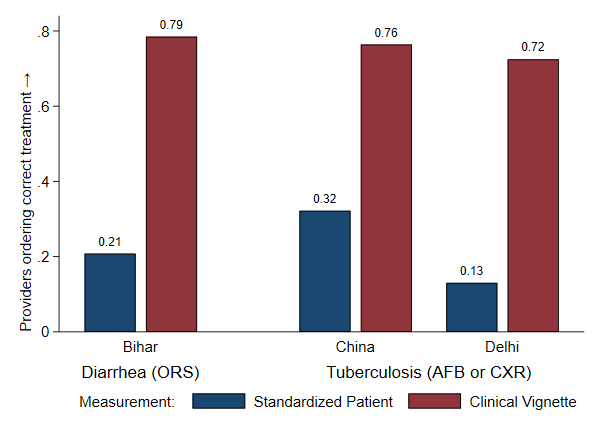

In [10]:
graph bar treat_correct ///
	, over(type) asy bargap(20) over(study) over(case) nofill ///
	blabel(bar, format(%9.2f)) ///
	$graph_opts1 bar(1 , lc(black) lw(thin) fi(100)) bar(2 , lc(black) lw(thin) fi(100)) ///
	legend(r(1) order(0 "Measurement:" 1 "Standardized Patient" 2 "Clinical Vignette")) ///
	ytit("Providers ordering correct treatment {&rarr}", placement(bottom) justification(left)) ylab($pct)

### 11. Exporting the graph

In [11]:
graph export "figure.png" , replace width(1000)

(file figure.png written in PNG format)
